# _*Experiment Grover's Algorithm to Perform Quantum Search from Aqua*_
<div class="alert alert-block alert-info">
<b>Note:</b>

This notebook demonstrates how to use the `Qiskit Aqua` library `Grover` search algorithm and process the result.

In [1]:
import pylab
import numpy as np
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua import run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

## Use Quantum Search to Find Solutions to 3-SAT Problems
<div class="alert alert-block alert-info">
<b>Note:</b>

Let's look at an example 3-Satisfiability (3-SAT) problem and walkthrough how we can use Quantum Search to find its satisfying solutions. 3-SAT problems are usually expressed in [Conjunctive Normal Forms (CNF)](https://en.wikipedia.org/wiki/Conjunctive_normal_form) and written in the [DIMACS-CNF](https://www.satcompetition.org/2009/format-benchmarks2009.html) format. For example:

In [ ]:
input_3sat_instance_example = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

<div class="alert alert-block alert-info">
<b>Note: CNF Format </b>
    
The CNF of this 3-SAT instance contains 3 variables and 5 clauses:

$(\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee v_3)$

It can be verified that this 3-SAT problem instance has three satisfying solutions:

$(v_1, v_2, v_3) = (T, F, T)$ or $(F, F, F)$ or $(T, T, F)$

Or, expressed using the DIMACS notation:

`1 -2 3`, or `-1 -2 -3`, or `1 2 -3`.



## First Challenge
<div class="alert alert-block alert-info">
<b>Note: Your first Challenge</b>

You will use $Qiskit$ $Aqua$ to implement Grover search algorithm. You'll have to perform the following

    
- Express the logical expression below in [DIMACS-CNF] format -->   (https://www.satcompetition.org/2009/format-benchmarks2009.html) : $(v_1 \vee \neg v_2 \vee  v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge ( v_1 \vee  v_2 \vee  v_3) \wedge (\neg v_1 \vee \neg v_2 \vee  v_3)$
- Construct the Oracle circuit using the DIMACS-CNF file and Aqua "LogicalExpressionOracle" function
- Create a Grover instance 
- Run the grover circuit to the $Aer$ $qasm$_$simulator$

In [ ]:
# Create the expression in DIMACS-CNF format
input_3sat='''

'''

<div class="alert alert-block alert-info">
<b>Note: </b>
Then create the $oracle$ for your $Grover$ search algorithm. In particular, you'll use the `LogicalExpressionOracle` component provided by Aqua, which supports parsing DIMACS-CNF format strings and constructing the corresponding oracle circuit.

In [ ]:
# Construct the Oracle Circuit using the "LogicalExpressionOracle" function. Set the optimisation parameter to "True"
oracle = ....

# Draw the circuit of the oracle with the method .circuit.draw()



In [ ]:
# create a grover instance with the function Grover
grover = Grover(.....) 


In [ ]:
# Load the qasm_simulator backend from Aer module
backend = ....

# Execute the grover instance using the qasm_simulator from Aer. Run 1024 shots and put the results into a result variable.  
result = grover.......

# print the results of the experiment result['result'] or result['measurement']
print('The corresponding result is: ',result['result'], 'or',  result['measurement'])

In [ ]:
# plot the histogram using the plot_histogram function on result['measurement']
plot_histogram......

<div class="alert alert-block alert-info">
<b>Note: number of Grover Iterations</b>

The Grover search result that you obtained was executed with $1$ iteration of the algorithm. Try using num_iterations to 2 and 3 in the grover algorithm 
- grover = Grover(...., num_iterations=2) 

What do you notice when changing the number of Iterations ? 

What is the optimum iteration value in that case ? 



<div class="alert alert-block alert-info">
<b>Note: Using declarative approach</b>

Grover algorithm can also been invoked using a $declarative$ $approach$ rather than the $programmatic$ $approach$. 
The declarative approach uses a json configuration dictionary containning the different parameters some dependent objects :   

<div class="alert alert-block alert-info">
<b>Note: Here below we provide a json example. You'll have to run the Grover algorithm using the json declarative approach  </b>


In [ ]:
# In this example, the json specifies the algorithm, the method to construct the oracle, the DIMACS-CNF file encoding the logical expression and the backend. 
params = {
    'problem': {
        'name': 'search',
    },
    'algorithm': {
        'name': 'Grover'
        'num_iterations': 1
    },
    'oracle': {
        'name': 'LogicalExpressionOracle',
        'expression': input_3sat
    },
    'backend': {
        'shots': 1000,
    },
}

In [ ]:
# Use "run_algorithm" function using the json previously defined. Run the algorithm using the Aer backend "qasm_simulator" 
# The input params being the declarative form of the dictionary/json.

run_algorithm(...........



In [ ]:
# Plot the results using the plot_histogram function on result_dict['measurement']

plot_histogram.....

## Second Challenge - Quantum Search with Oracles from TruthTable
<div class="alert alert-block alert-info">
<b>Note: Your second Challenge</b>
    
With Aqua, `Oracles` can also be constructed from $truth$ $tables$, meaning we can also perform Quantum Search on $truth$ $tables$. Even though this might seem like a moot point as we would be essentially searching for entries of a truth table with the $1$ value, it'd a good example for demonstrative purpose.
    
You will use $Qiskit$ $Aqua$ to implement Grover search algorithm. You'll have to perform the following: Using Grover, your chalenge is to find the solutions $0000$ and $1111$

- Create the truthtable that is specified as a bitstring containing values of all entries in the table. It has length 16, $x\in [0,2^n -1 ]$, so the corresponding truth table is of 4 input bits. The corresponding truth table values must target $1$ for entries $0000$ and $1111$
- Construct the Oracle circuit using the $truth$ $table$ you defined 
- Create a Grover instance using your oracle
- Run the grover circuit to the $Aer$ $qasm$_$simulator$
- Run the Grover circuit using a $real$ $backend$


In [ ]:
truthtable = ''    #  your bitstring 

<div class="alert alert-block alert-info">
<b>Note:</b>
Next, we can setup the `Oracle` and `Grover` objects to perform Quantum Search as usual.

In [ ]:
# Create the oracle using the "TruthTableOracle" function. use the truthtable as argument. 

oracle = ........


In [ ]:
# Create a Grover instance using the "Grover" function. Use the oracle as argument

grover = ...... 


In [ ]:
# Run the Grover algorithm using the "qasm_simulator" backend. execute 1024 shots

result = grover.run(.......
                    

In [ ]:
# Plot the results using the plot_histogram function on result['measurement']

plot_histogram(.....

In [ ]:
# Now execute the circuit using a real backend. You'll use the least busy real backend

# import IBMQ from qiskit
from qiskit import IBMQ

# Configure your IBMQ credentials. 
# Run the following command to store your API token locally for later use. This saves your account to disk.
IBMQ.save_account('YOUR_API_TOKEN')

# Accessing your IBMQ backends. Load your account to access your "backend" devices
provider = IBMQ.load_account()

# A provider gives access to specific devices, depending on the group, the project or the hub your have access to:
# list your provider
print(provider)


In [ ]:
# list the least busy "backend" among the available ones. 
from qiskit.providers.ibmq import least_busy

lb_backend = least_busy(available_backends)

print('The least busy backend is: ', lb_backend.name())

In [ ]:
# Execute the circuit on the real backend, running it 1000 times.
job_real = execute(......

# Grab the results from the job.
result_real = ........

# Print the counts, which are contained in a Python dictionary
counts_real = ........

In [ ]:
# plot the histogram and compare it with the previous run on the simulator
# Firt we set the legend 
legend=['simulator', 'real device']

plot_histogram([................

# Solutions

### First Challenge solution
<div class="alert alert-success">
  <strong>Here below you'll find the Solution for the "first Challenge"</strong> 
</div> 


In [2]:
# Create the expression above in DIMACS-CNF format 
# Logical expression :(𝑣1∨¬𝑣2∨𝑣3)∧(𝑣1∨𝑣2∨¬𝑣3)∧(¬𝑣1∨𝑣2∨¬𝑣3)∧(𝑣1∨¬𝑣2∨¬𝑣3)∧(¬𝑣1∨¬𝑣2∨¬𝑣3)
input_3sat='''
c example DIMACS-CNF 3-SAT
p cnf 3 7
1 -2 3 0
1 2 -3 0
-1 2 -3 0
1 -2 -3 0
-1 -2 -3 0
1 2 3 0
-1 -2 3 0
'''

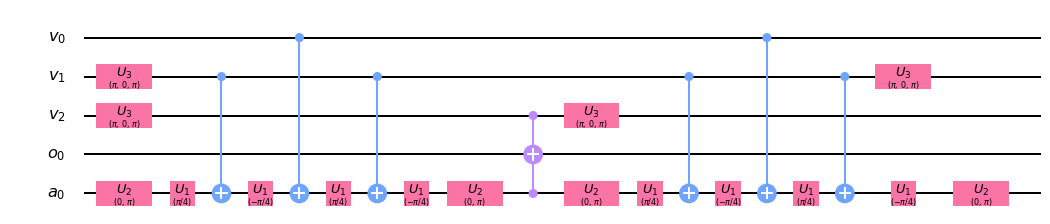

In [59]:
# Construct the Oracle Circuit with the LogicalExpressionOracle and set the optimisation parameter to True
oracle = LogicalExpressionOracle(input_3sat, optimization=True)

# Draw the circuit of oracle with the method .circuit.draw()
oracle.circuit.draw(output='mpl', scale=0.6)

In [69]:
# Create a grover instance with the Grover function 
# use the num_iterations by default = 1
grover = Grover(oracle, num_iterations=1)

<div class="alert alert-success">
  <strong>We can then configure the backend and run the Grover instance to get the result:</strong> 
</div> 


In [70]:
# Load the qasm_simulator backend from Aer module
backend = Aer.get_backend('qasm_simulator')

# Create a quantum_instance with QuantumInstance
quantum_instance = QuantumInstance(backend, shots=1024)

# run the Grover algorithm on the quantum_instance
result = grover.run(quantum_instance)

# print the results of the experiment result['result'] or result['measurement']
print('The corresponding result is: ',result['result'], 'or',  result['measurement'])

The corresponding result is:  [1, -2, -3] or {'011': 36, '010': 46, '000': 31, '101': 34, '100': 34, '001': 778, '111': 27, '110': 38}


<div class="alert alert-success">
  <strong>Note:</strong> 

As seen above, a satisfying solution to the specified 3-SAT problem is obtained. And it is indeed one of the three satisfying solutions.

Since we used the `'qasm_simulator'`, the complete measurement result is also returned, as shown in the plot below, where it can be seen that the binary strings `001` (note the bit order in the string), corresponding to the  satisfying solution that has high probabilities associated with it.
</div>

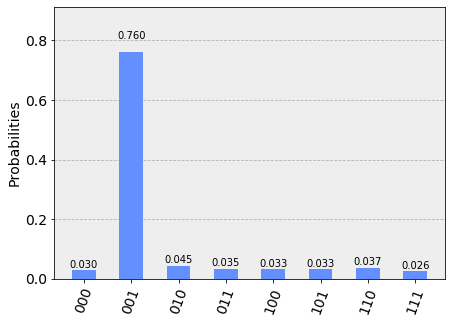

In [71]:
# plot the histogram with the plot_histogram function on result['measurement']
plot_histogram(result['measurement'])

<div class="alert alert-success">
  <strong>Note:</strong> 

The Grover search result, has been obtained running $1$ iteration of the algorithm. Try using num_iterations to 2 and 3 and re-rerun  the Grover circuit.  What do you notice when changing the number of Iterations ? 

Answer: the optimum number of iterations is given by : ${\frac \pi{4}}$${\sqrt{2^n}}$  

So the optimum value is $3$

<div class="alert alert-success">
  <strong>Note:</strong> 

The above step-by-step programmatic approach can also be achieved by using a json configuration dictionary with the parameters for the algorithm and any other dependent objects it requires, as follows:

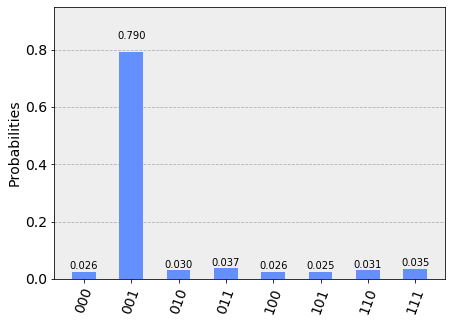

In [74]:
params = {
    'problem': {
        'name': 'search',
    },
    'algorithm': {
        'name': 'Grover',
        'num_iterations': 1
    },
    'oracle': {
        'name': 'LogicalExpressionOracle',
        'expression': input_3sat
    },
    'backend': {
        'shots': 1000,
    },
}
# Use run_algorithm function on the backend with specified params above
result_dict = run_algorithm(params, backend=backend)

# plot the histogram with the plot_histogram function on result_dict['measurement']
plot_histogram(result_dict['measurement'])

### Second Challenge solution
<div class="alert alert-success">
  <strong>Here below you'll find the Solution for the "Second Challenge"</strong> 
</div> 

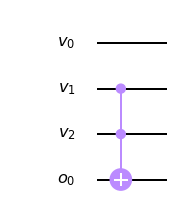

In [118]:
# store the truthtable bitstring on a variable
your_truthtable='00000011'
# Create the Oracle with the TruthTableOracle Method with optimization=True
oracle = TruthTableOracle(your_truthtable, mct_mode='basic', optimization=True)

# Draw the oracle circuit with output='mpl'
oracle.circuit.draw(output='mpl')

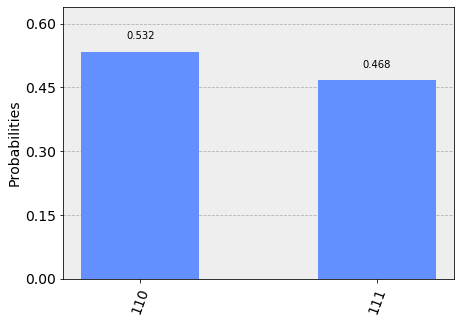

In [119]:
# Create the Grover algorithm
grover = Grover(oracle, num_iterations=1)

# get the results
result_simulator = grover.run(QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1000))

sim = result_simulator['measurement']

# plot the results on the histogram
plot_histogram(result_simulator['measurement'])

In [143]:
# Now execute the circuit using a real backend. You'll use the least busy real backend

# import IBMQ from qiskit
from qiskit import IBMQ

# Configure your IBMQ credentials. 
# Run the following command to store your API token locally for later use. This saves your account to disk.
# IBMQ.save_account('YOUR_API_TOKEN')

# Accessing your IBMQ backends. Load your account to access your "backend" devices
provider = IBMQ.load_account()

# A provider gives access to specific devices, depending on the group, the project or the hub your have access to:
# list your provider
print(provider)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [144]:
# List the backends that are in a status "available" for sending jobs as some backends might be in "maintenance" 
# Also we don't want to use the simulator. 

available_backends=provider.backends(simulator=False, operational=True)
available_backends

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [145]:
# list the least busy "backend" among the available ones. 
from qiskit.providers.ibmq import least_busy

lb_backend = least_busy(available_backends)

print('The least busy backend is: ', lb_backend.name())

In [129]:
lb_backend.configuration().quantum_volume

16

In [141]:
# Execute the circuit on the real backend device, running it 1000 times.

result_real = grover.run(QuantumInstance(lb_backend, shots=1000))
real = result_real['measurement']

The skip Qobj validation does not work for IBMQ provider. Disable it.


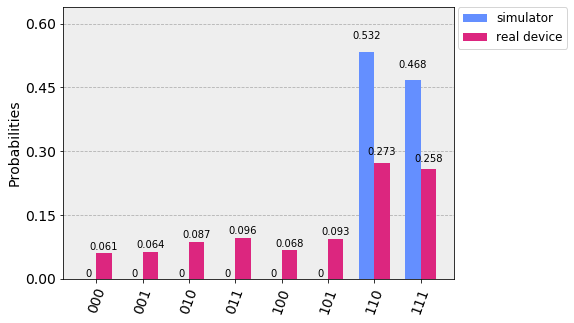

In [142]:
legend=['simulator', 'real device']

plot_histogram([sim, real], legend=legend)
#plot_histogram(result_simulator['measurement'])